# Lendo dados de geociência

## License

All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

## Imports

Coloque **todos** os `import` na célula abaixo. Não se esqueça do `%matplotlib inline` para que os gráficos apareçam no notebook.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

## IMPORTANTE

Agora que vocês sabem técnicas de programação defensiva, eu espero que todo o código que vocês fizerem abaixo utilizem essas técnicas. Crie docstrings para suas funções, cheque as entradas (quando for possível) e cheque as saídas. **Não esqueçam dos comentários**.

## Temperatura no Rio de Janeiro

O arquivo `data/23.31S-42.82W-TAVG-Trend.txt` contém dados de temperatura média mensal para a cidade do Rio de Janeiro. O arquivo também contém médias móveis anual, 5, 10 e 20 anos. Esses dados foram baixados do site Berkeley Earth (http://berkeleyearth.lbl.gov/locations/23.31S-42.82W).

### Tarefa

Faça duas funções, uma que lê os dados de temperatura mensal, outra que lê os dados da média móvel anual.
As duas funções devem:

* Receber como entrada **somente** o nome do arquivo de dados.
* Retornar duas listas: uma com as datas referentes aos dados e outra com os dados de temperatura.
* As datas retornadas devem ser em anos decimais. Ex: Janeiro de 1984 seria 1984.0833333333333 (1984 + 1/12).
* Datas sem valores de temperatura (NaN) devem ser ignoradas (não incluidas nas listas).

Utilize suas funções para carregar os dados e fazer um gráfico da temperatura média mensal e média movel anual pelo tempo.

In [5]:
arquivo = open('data/23.31S-42.82W-TAVG-Trend.txt')
# criação das listas
data = [] 
mes = []  
data_mes = [] 
mes_decimal = [] 
temp = [] 
temp_real = [] 

for linha in arquivo: #para rodar cada linha do arquivo
    if linha[0] != "%": # "!" igual a diferente de
        split = linha.split() #para separar cada componente das linhas
        if len(split) != 0: #para excluir valores vazios
            if split[2] != "NaN":   # para excluir "NaN"
                data.append(float(split[0])) #para adicionar tds os demais valotes
                mes.append(float(split[1]))
                temp.append(float(split[2]))

                
for j in mes: #para transformar meses em numeros decimais
    j = j/12
    mes_decimal.append(float(j))
    
for i in range(len(data)): #para somar os decimais de meses aos anos referentes
    x = data[i] + mes_decimal[i]
    data_mes.append(x)
    
for i in range(len(temp)): #para somar as temperaturas a media fornecida
    y = temp[i]+24.01
    temp_real.append(y)
    
arquivo.close() #fechar arquivo

In [9]:
arquivo = open('data/23.31S-42.82W-TAVG-Trend.txt') 
# listas para criar a media movel anual
data = []
mes = []
data_ano = []
mes_decimal = []
temp = []
temp_med_ano = [] #lista para colocar os dados de temperatura media anual

for linha in arquivo: 
    if linha[0] != "%": 
        split = linha.split() 
        if len(split) != 0:
            if split[4] != "NaN":
                data.append(float(split[0]))
                mes.append(float(split[1]))
                temp.append(float(split[4]))

                
for j in mes: 
    j = j/12
    mes_decimal.append(float(j))
    
for i in range(len(data)):
    x = data[i] + mes_decimal[i]
    data_ano.append(x)
    
for k in range(len(temp)):
    y = temp[k]+24.01
    temp_med_ano.append(y)

    
arquivo.close()

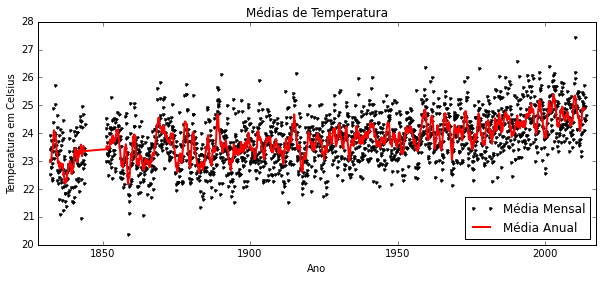

In [10]:
plt.figure(figsize = [10, 4]) #para criar uma figura em branco
plt.plot(data_mes, temp_real, '.k', label='Média Mensal') #para colocar os dados
plt.plot(data_ano, temp_med_ano, 'r', label='Média Anual', linewidth = 2) #para colocar os dados
plt.title("Médias de Temperatura") #título do grafico
plt.xlabel(u"Ano") #titulo do eixo X
plt.ylabel("Temperatura em Celsius") #titulo do eixo Y
plt.xlim(1828,2017) #definição do eixo x
plt.legend(loc='lower right', fontsize='large') #posicionamento da legenda

### Resultado esperado

O gráfico final deve ser parecido com o abaixo:

![images/media-mensal-temp-rio.png](images/media-mensal-temp-rio.png)

### Tarefa

Faça uma função que calcule a temperatura média anual a partir das temperaturas mensais. A sua função deve:

* Receber como entrada a lista das datas e a lista das temperaturas mensais.
* Retornar duas listas: uma com os anos e outra com as temperaturas médias correspondetes.
* Anos que não contem dados de todos os 12 meses devem ser ignorados (não incluídos nas listas retornadas).

Utilize sua função para calcular a média anual. Faça um gráfico da temperatura média anual por ano junto com a média móvel anual.

**Dica**: A função `math.floor` retorna o número inteiro que precede um número real. Ex: `math.floor(1984.23) == 1984`

In [11]:
arquivo = open('data/23.31S-42.82W-TAVG-Trend.txt') 
ano = [] 
temp_ano = [] 

for x in range(len(data_mes)): #rodar cada linha da arquivo
    y = x+11 #y é igual a 11 posicoes a frente do item x
    if y < len(data_mes): #para que y não ultrapasse o tamanho total da lista
        if math.floor(data_mes[x]) == math.floor(data_mes[y]): #para não rodar 12 elementos
            media = (temp_real[x]+temp_real[x+1]+temp_real[x+2]+temp_real[x+3]+temp_real[x+4]+temp_real[x+5]+temp_real[x+6]+temp_real[x+7]+temp_real[x+8]+temp_real[x+9]+temp_real[x+10]+temp_real[x+11])/12 # para fazer a media 
            temp_ano.append(media) #para adicionar a temperatura media na lista
            ano.append(data_mes[x]) #para adicionar o ano na outra lista
arquivo.close()

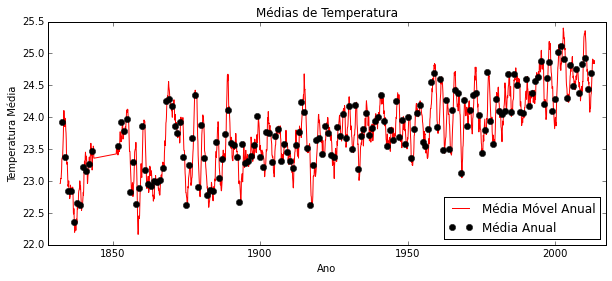

In [12]:
plt.figure(figsize = [10, 4]) # figura em branco
plt.plot(data_ano, temp_med_ano, 'r', label='Média Móvel Anual') #para adicionar os dados
plt.plot(ano, temp_ano, 'ok', label='Média Anual', linewidth = 2) #para adicionar os dados
plt.title("Médias de Temperatura") #título
plt.xlabel(u"Ano") #titulo do eixo X
plt.ylabel("Temperatura Média") #titulo do eixo Y
plt.xlim(1828,2017)
plt.legend(loc='lower right', fontsize='large') #local da legenda

### Resultado esperado

O gráfico final deve ser parecido com o abaixo:

![images/media-anual-temp-rio.png](images/media-anual-temp-rio.png)

## Tarefa Bônus

Salve os dados da média anual em um arquivo CSV (comma separated values) chamado `temp-media-anual.csv`. Os valores devem ser separados por `,`. A primeira coluna deve conter os anos e a segunda as temperaturas. Esse arquivo deve estar presente em seu repositório (dê `git add` nele).